In [1]:
import time
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib

In [2]:
# We want to build a list of 17 digit integers and strings
min_range_start = 1000000000000000
max_range_start = (min_range_start * 10 - 1)

In [3]:
num_list = []
for i in range(100000):
    num_list.append(random.randint(min_range_start, max_range_start))

str_list = []
for i in range(100000):
    str_list.append(random.randint(min_range_start, max_range_start))

num_list


[8570482307993526,
 8809308890057528,
 3868319496325765,
 7845759953055709,
 9874638599483602,
 3892156221021521,
 2009141348244397,
 1520121926784482,
 2766942810845866,
 7048389103386209,
 2774140332269494,
 5718501857325856,
 3134390569697364,
 3850797408258790,
 9989112770057732,
 9668386968754964,
 7882585931720462,
 2390310017831951,
 1445310959593373,
 5186428084068034,
 1024986293811020,
 3117053281285042,
 6458297119735881,
 8846348669896141,
 5034318832469874,
 8795014650160597,
 1403270373112269,
 6275037097942482,
 1780185897155636,
 4313176526451858,
 2653885188570572,
 6299595210363910,
 7735724024126678,
 2785593299493412,
 3659986555558563,
 7160457055468111,
 2277990207054253,
 3534582360645744,
 4460756057931570,
 2594063870311831,
 5720949642733797,
 8854341812727028,
 9775845675299008,
 9627141456954786,
 4495158544998144,
 1711214975134851,
 2001852120941357,
 4091167776892871,
 5613421922656531,
 2053457644636041,
 8043173558656846,
 1051205438715952,
 52786021036

In [4]:
num_time_list = []

for i in range(100000):
    x = random.randint(min_range_start,max_range_start)
    t1 = time.time()
    if( x in num_list):
        t2 = time.time()
        num_time_list.append(int((t2-t1)*1000*1000)) # micro-seconds
    else:
        t2 = time.time()
        num_time_list.append(int((t2-t1)*1000*1000)) 


In [5]:

str_time_list = []

for i in range(100000):
    x = str(random.randint(min_range_start,max_range_start))
    t1 = time.time()
    if( x in str_list ):
        t2 = time.time()
        str_time_list.append(int((t2-t1)*1000*1000))
    else:
        t2 = time.time()
        str_time_list.append(int((t2-t1)*1000*1000))

In [6]:
df = pd.DataFrame( { "int_time" : num_time_list, "str_time" : str_time_list}, columns=["int_time", "str_time"])

In [22]:
df.describe()

,int_time,str_time
count,100000.000000,100000.000000
mean,571.237460,871.816330
std,21.026666,23.072817
min,545.000000,859.000000
25%,565.000000,865.000000
50%,567.000000,867.000000
75%,574.000000,874.000000
max,3306.000000,3157.000000


In [8]:
# load this after you've run the main.js (see the main.js file for instructions)

from numpy import loadtxt
file = open("int_timings.txt","r")
js_int_timings = loadtxt(file,delimiter=",")

In [9]:
from numpy import loadtxt
file = open("str_timings.txt","r")
str_int_timings = loadtxt(file,delimiter=",")

In [10]:
df2 = pd.DataFrame( { "js_int_time" : js_int_timings, "js_str_time" : str_int_timings})

In [11]:
df2.describe()

,js_int_time,js_str_time
count,100000.000000,100000.000000
mean,64.815700,408.222700
std,5.132066,42.584335
min,62.000000,312.000000
25%,64.000000,388.000000
50%,64.000000,391.000000
75%,64.000000,409.000000
max,1210.000000,2737.000000


In [23]:
cf = pd.concat([df,df2], axis=1)

In [13]:
cf.describe()

,int_time,str_time,js_int_time,js_str_time
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,571.237460,871.816330,64.815700,408.222700
std,21.026666,23.072817,5.132066,42.584335
min,545.000000,859.000000,62.000000,312.000000
25%,565.000000,865.000000,64.000000,388.000000
50%,567.000000,867.000000,64.000000,391.000000
75%,574.000000,874.000000,64.000000,409.000000
max,3306.000000,3157.000000,1210.000000,2737.000000


In [14]:
# if you want to see which fonts are accessible for you
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

Fontconfig warning: ignoring UTF-8: not a valid region tag


['/System/Library/Fonts/Supplemental/STIXIntUpDReg.otf',
 '/System/Library/Fonts/Supplemental/Phosphate.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansOldItalic-Regular.ttf',
 '/System/Library/Fonts/Supplemental/STIXIntUpSmReg.otf',
 '/System/Library/Fonts/Supplemental/NotoSansHanunoo-Regular.ttf',
 '/System/Library/Fonts/Supplemental/AppleGothic.ttf',
 '/System/Library/Fonts/Supplemental/NotoSerifBalinese-Regular.ttf',
 '/System/Library/Fonts/NotoSerifMyanmar.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansAvestan-Regular.ttf',
 '/System/Library/Fonts/Supplemental/SuperClarendon.ttc',
 '/System/Library/Fonts/ヒラギノ角ゴシック W7.ttc',
 '/System/Library/Fonts/Supplemental/STIXGeneralItalic.otf',
 '/System/Library/Fonts/SFCompactItalic.ttf',
 '/System/Library/Fonts/Supplemental/Krungthep.ttf',
 '/Users/airkakodker/Library/Fonts/Roboto-ThinItalic.ttf',
 '/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf',
 '/System/Library/Fonts/Supplemental/Trebuchet MS Bold.ttf',
 '/System/Librar

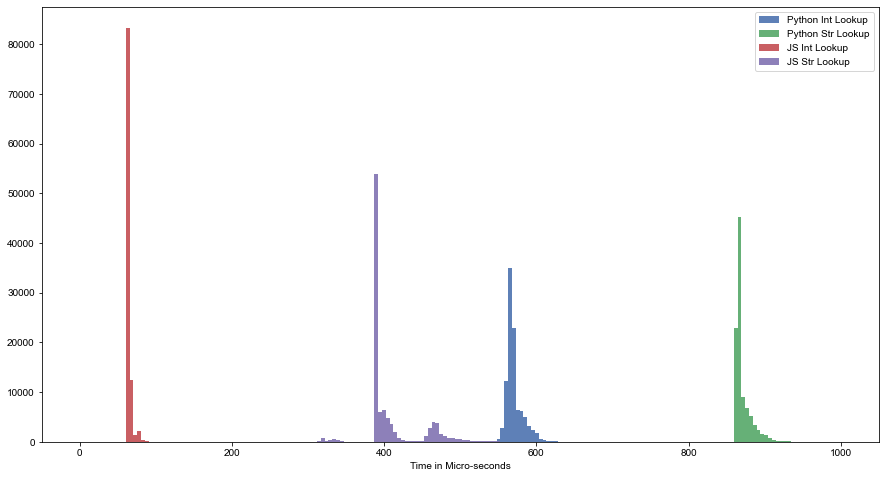

In [15]:

bins = np.linspace(0, 1000, 200) # generate 200 equal bins from 0 to 1000
matplotlib.rcParams['font.family'] = "Arial"

pyplot.style.use("seaborn-deep")
pyplot.figure(figsize=(15,8))
pyplot.hist(cf.int_time, bins, alpha=0.9, label='Python Int Lookup')
pyplot.hist(cf.str_time, bins, alpha=0.9, label='Python Str Lookup')
pyplot.hist(cf.js_int_time, bins, alpha=0.9, label='JS Int Lookup')
pyplot.hist(cf.js_str_time, bins, alpha=0.9, label='JS Str Lookup')
pyplot.xlabel("Time in Micro-seconds", fontsize="10")

pyplot.legend(loc='upper right')
pyplot.show()


In [16]:
### Checking with numpy implementation
num_list = []
for i in range(100000):
    num_list.append(random.randint(min_range_start, max_range_start))

str_list = []
for i in range(100000):
    str_list.append(random.randint(min_range_start, max_range_start))

np_num_list = np.asarray(num_list, dtype=np.int32)
np_str_list = np.asarray(str_list, dtype=np.string_)





In [17]:
np_num_time_list = []

for i in range(100000):
    x = random.randint(min_range_start,max_range_start)
    t1 = time.time()
    if( np.where(np_num_list == x)):
        t2 = time.time()
        np_num_time_list.append(int((t2-t1)*1000*1000)) # micro-seconds
    else:
        t2 = time.time()
        np_num_time_list.append(int((t2-t1)*1000*1000)) 

np_str_time_list = []

for i in range(100000):
    x = random.randint(min_range_start,max_range_start)
    t1 = time.time()
    if( np.where(np_str_list == str(x))):
        t2 = time.time()
        np_str_time_list.append(int((t2-t1)*1000*1000)) # micro-seconds
    else:
        t2 = time.time()
        np_str_time_list.append(int((t2-t1)*1000*1000)) 



In [24]:
df3 = pd.DataFrame( { "np_int_time" : np_num_time_list, "np_str_time" : np_str_time_list})

cf = pd.concat([cf, df3], axis = 1)

In [19]:
cf

,int_time,str_time,js_int_time,js_str_time,np_int_time,np_str_time
0,598,1197,1210.0,312.0,236,26
1,840,902,93.0,312.0,108,2
2,627,913,82.0,312.0,92,2
3,627,901,82.0,312.0,82,2
4,648,902,84.0,312.0,56,1
...,...,...,...,...,...,...
99995,580,864,66.0,1738.0,51,1
99996,561,864,64.0,1785.0,51,0
99997,568,877,64.0,1862.0,50,1
99998,585,864,64.0,2067.0,51,1


In [20]:
cf.describe()

,int_time,str_time,js_int_time,js_str_time,np_int_time,np_str_time
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,571.237460,871.816330,64.815700,408.222700,51.931680,0.91724
std,21.026666,23.072817,5.132066,42.584335,12.419427,0.88901
min,545.000000,859.000000,62.000000,312.000000,49.000000,0.00000
25%,565.000000,865.000000,64.000000,388.000000,51.000000,0.00000
50%,567.000000,867.000000,64.000000,391.000000,51.000000,1.00000
75%,574.000000,874.000000,64.000000,409.000000,51.000000,2.00000
max,3306.000000,3157.000000,1210.000000,2737.000000,3267.000000,39.00000


In [25]:
import timeit

random_int_list = ()


stp = '''
import timeit
import random
min_range_start = 1000000000000000
max_range_start = (min_range_start * 10 - 1)
tt_num_list = [random.randint(min_range_start, max_range_start) for i in range(100000)]
tt_random_num = [random.randint(min_range_start, max_range_start) for x in range(100000)]
'''

stp2 = '''
import timeit
import random
min_range_start = 1000000000000000
max_range_start = (min_range_start * 10 - 1)
tt_str_list = [random.randint(min_range_start, max_range_start) for i in range(100000)]
tt_random_str = [str(random.randint(min_range_start, max_range_start)) for x in range(100000)]
'''

stm = '''
1 if 5237463704375238 in tt_num_list else 0
'''
stm2 = '''
1 if '5237463704375238' in tt_str_list else 0
'''

times_int = timeit.repeat(stmt = stm, setup=stp, repeat = 1000, number = 10)
times_str = timeit.repeat(stmt = stm2, setup=stp2, repeat = 1000, number = 10)




    


In [26]:
times_int = [ i * 1000 * 1000 / 10 for i in times_int] ## reducing to micro-seconds and dividing by number for per run
times_str = [ i * 1000 * 1000 / 10 for i in times_str]



In [30]:
stp = '''
import timeit
import random
import numpy as np
min_range_start = 1000000000000000
max_range_start = (min_range_start * 10 - 1)
tt_num_list = [random.randint(min_range_start, max_range_start) for i in range(100000)]
tt_num_list = np.asarray(tt_num_list, dtype=np.int32)
'''

stp2 = '''
import timeit
import random
import numpy as np
min_range_start = 1000000000000000
max_range_start = (min_range_start * 10 - 1)
tt_str_list = [random.randint(min_range_start, max_range_start) for i in range(100000)]
tt_str_list = np.asarray(tt_str_list, dtype=np.string_)
'''

stm = '''
1 if np.where(tt_num_list == 5237463704375238 ) else 0
'''
stm2 = '''
1 if np.where(tt_str_list == '5237463704375238' ) else 0
'''


np_times_int = timeit.repeat(stmt = stm, setup=stp, repeat = 1000, number = 10)
np_times_str = timeit.repeat(stmt = stm2, setup=stp2, repeat = 1000, number = 10)

np_times_int = [ i * 1000 * 1000 / 10 for i in np_times_int] ## reducing to micro-seconds and dividing by number for per run
np_times_str = [ i * 1000 * 1000 / 10 for i in np_times_str]


In [32]:
df4 = pd.DataFrame({ "timeit_list_int_lookup" : times_int, "timeit_list_str_lookup" : times_str, "timeit_np_int_lookup": np_times_str, "timeit_np_str_lookup": np_times_str})
cf = pd.concat([cf, df4], axis=1)

In [33]:
cf


,int_time,str_time,js_int_time,js_str_time,np_int_time,np_str_time,timeit_list_int_lookup,timeit_list_str_lookup,timeit_np_int_lookup,timeit_np_str_lookup
0,598,1197,1210.0,312.0,236,26,583.1708,874.3667,4.0250,4.0250
1,840,902,93.0,312.0,108,2,580.2708,869.6833,3.1375,3.1375
2,627,913,82.0,312.0,92,2,591.1500,866.0667,3.4875,3.4875
3,627,901,82.0,312.0,82,2,587.7125,870.9250,3.8583,3.8583
4,648,902,84.0,312.0,56,1,586.2375,863.6250,3.3417,3.3417
...,...,...,...,...,...,...,...,...,...,...
99995,580,864,66.0,1738.0,51,1,NaN,NaN,NaN,NaN
99996,561,864,64.0,1785.0,51,0,NaN,NaN,NaN,NaN
99997,568,877,64.0,1862.0,50,1,NaN,NaN,NaN,NaN
99998,585,864,64.0,2067.0,51,1,NaN,NaN,NaN,NaN


In [34]:
cf.describe()

,int_time,str_time,js_int_time,js_str_time,np_int_time,np_str_time,timeit_list_int_lookup,timeit_list_str_lookup,timeit_np_int_lookup,timeit_np_str_lookup
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,571.237460,871.816330,64.815700,408.222700,51.931680,0.91724,583.616649,877.071706,3.539305,3.539305
std,21.026666,23.072817,5.132066,42.584335,12.419427,0.88901,20.520850,13.915159,0.568347,0.568347
min,545.000000,859.000000,62.000000,312.000000,49.000000,0.00000,560.625000,861.783400,2.325000,2.325000
25%,565.000000,865.000000,64.000000,388.000000,51.000000,0.00000,574.535425,869.620850,3.141700,3.141700
50%,567.000000,867.000000,64.000000,391.000000,51.000000,1.00000,579.287450,873.595800,3.445850,3.445850
75%,574.000000,874.000000,64.000000,409.000000,51.000000,2.00000,586.380150,879.427075,3.925000,3.925000
max,3306.000000,3157.000000,1210.000000,2737.000000,3267.000000,39.00000,864.404200,1041.729200,5.804200,5.804200


In [53]:
cf.columns()

TypeError: 'Index' object is not callable

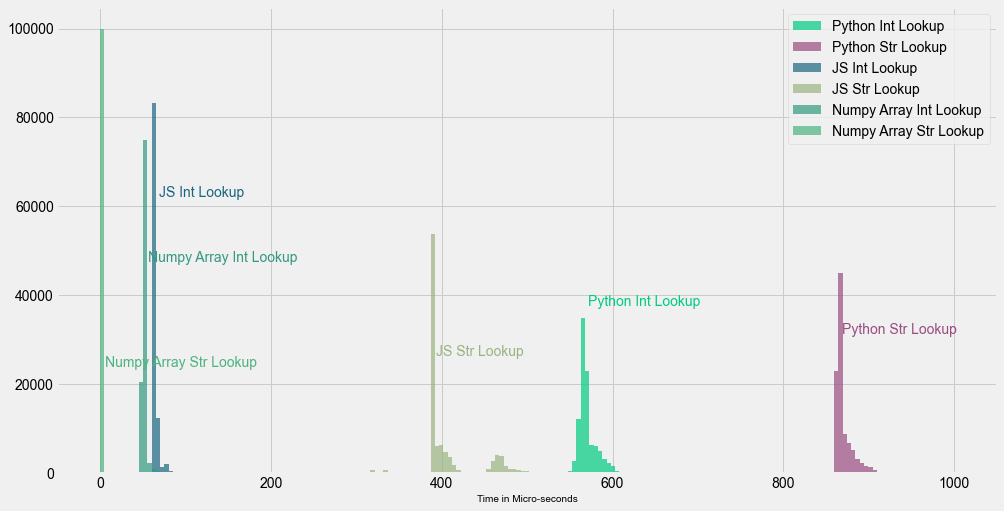

In [95]:
bins = np.linspace(0, 1000, 200) # generate 200 equal bins from 0 to 1000
matplotlib.rcParams['font.family'] = "Arial"
pyplot.style.use("fivethirtyeight")
pyplot.figure(figsize=(15,8))
labels = ['Python Int Lookup', 'Python Str Lookup', 'JS Int Lookup','JS Str Lookup' ,'Numpy Array Int Lookup','Numpy Array Str Lookup','TimeIt - Int Lookup','TimeIt - Str Lookup', 'TimeIt - Numpy Int Lookup' , 'TimeIt - Numpy Str Lookup']


for i in range(len(cf.columns)-4):
    r = np.round(np.random.rand(),1)
    g = np.round(np.random.rand(),1)
    b = .5
    a = .7
    pyplot.hist(cf.iloc[:, i], bins, color=[r,g,b,a], label=labels[i])
    #pyplot.annotate(labels[i], ( cf.iloc[:, i].mode()[0] + 10 * (7 - i), cf.iloc[:, i].value_counts()[cf.iloc[:, i].mode()[0]] + (5-i) * 1000), color=[r, g, b]) 
    pyplot.annotate(labels[i], ( cf.iloc[:, i].mode()[0] + 5, cf.iloc[:, i].value_counts()[cf.iloc[:, i].mode()[0]] + (3 - i) * 8000 ), color=[r, g, b]) 



pyplot.xlabel("Time in Micro-seconds", fontsize="10")

pyplot.legend(loc='upper right')
pyplot.show()

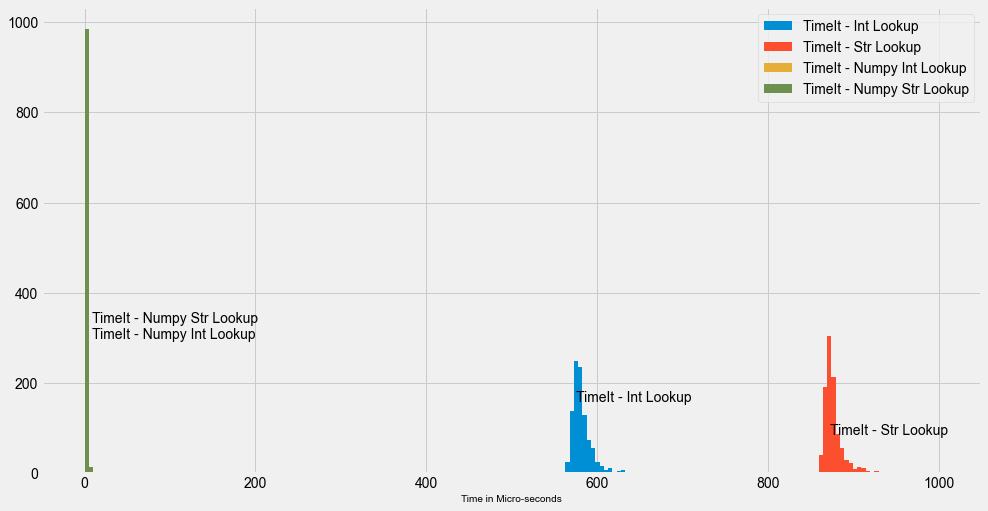

In [103]:
pyplot.style.use("fivethirtyeight")
pyplot.figure(figsize=(15,8))
for i in range(6, len(cf.columns)):
    
    pyplot.hist(cf.iloc[:, i], bins, label=labels[i])
    #pyplot.annotate(labels[i], ( cf.iloc[:, i].mode()[0] + 10 * (7 - i), cf.iloc[:, i].value_counts()[cf.iloc[:, i].mode()[0]] + (5-i) * 1000), color=[r, g, b]) 
    pyplot.annotate(labels[i], ( cf.iloc[:, i].mode()[0] + 5, cf.iloc[:, i].value_counts()[cf.iloc[:, i].mode()[0]] + 4 * random.randint(10, 100) )) 



pyplot.xlabel("Time in Micro-seconds", fontsize="10")

pyplot.legend(loc='upper right')
pyplot.show()